In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ROBOD

In [3]:
results = pd.read_csv('../results/results_ROBOD.csv')

In [4]:
results.head()

,Dataset,Model,|BatchSize,Lr,N_past,Hidden_size,Seed,BestEpoch,TestAcc,TestLoss,ValAcc,ValLoss,TestF1,ValF1,TestLoss.1,Train_days,Num_frozen,Type
0,ROBOD,LSTM,256.0,0.02,10.0,32.0,1111.0,4.0,0.779542,0.5103,0.723027,0.5958,0.480204,0.619227,0.123623,1,0,Transfer
1,ROBOD,LSTM,256.0,0.02,10.0,32.0,22.0,2.0,0.810498,0.4199,0.712328,0.5974,0.468205,0.583786,0.212016,1,0,Transfer
2,ROBOD,LSTM,256.0,0.02,10.0,32.0,333.0,1.0,0.813435,0.4373,0.707283,0.6671,0.458963,0.620801,0.312438,1,0,Transfer
3,ROBOD,LSTM,256.0,0.02,10.0,32.0,4444.0,2.0,0.784376,0.4607,0.704555,0.6173,0.475832,0.605104,0.202674,1,0,Transfer
4,ROBOD,LSTM,256.0,0.02,10.0,32.0,5555.0,4.0,0.763000,0.5985,0.719664,0.6441,0.482487,0.629132,0.130608,1,0,Transfer


In [5]:
grouped = results.groupby(['Train_days', 'Num_frozen', 'Type']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestF1', 'TestAcc']]
grouped.reset_index(inplace=True)
grouped.columns = grouped.columns.map('_'.join)
grouped

C:\Users\ermin.omeragic\AppData\Local\Temp\ipykernel_19564\2212941277.py:1: FutureWarning: ['Dataset', 'Model'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = results.groupby(['Train_days', 'Num_frozen', 'Type']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestF1', 'TestAcc']]


,Train_days_,Num_frozen_,Type_,TestF1_mean,TestF1_std,TestF1_count_nonzero,TestAcc_mean,TestAcc_std,TestAcc_count_nonzero
0,0,0,Naive,0.436511,NaN,1,0.723707,NaN,1
1,0,0,No transfer,0.386136,NaN,1,0.450079,NaN,1
2,0,1,Transfer,0.456175,NaN,1,0.797255,NaN,1
3,1,0,Naive,0.436511,NaN,1,0.723707,NaN,1
4,1,0,Transfer,0.480299,0.012776,9,0.782672,0.021505,9
5,1,1,Transfer,0.436880,0.000557,9,0.824814,0.001197,9
6,1,2,No transfer,0.416822,0.029754,9,0.591780,0.134080,9
7,1,2,RF,0.342708,0.054072,9,0.508047,0.106698,9
8,1,2,Transfer,0.428949,0.002398,9,0.834142,0.001149,9
9,2,0,Naive,0.437210,NaN,1,0.734106,NaN,1


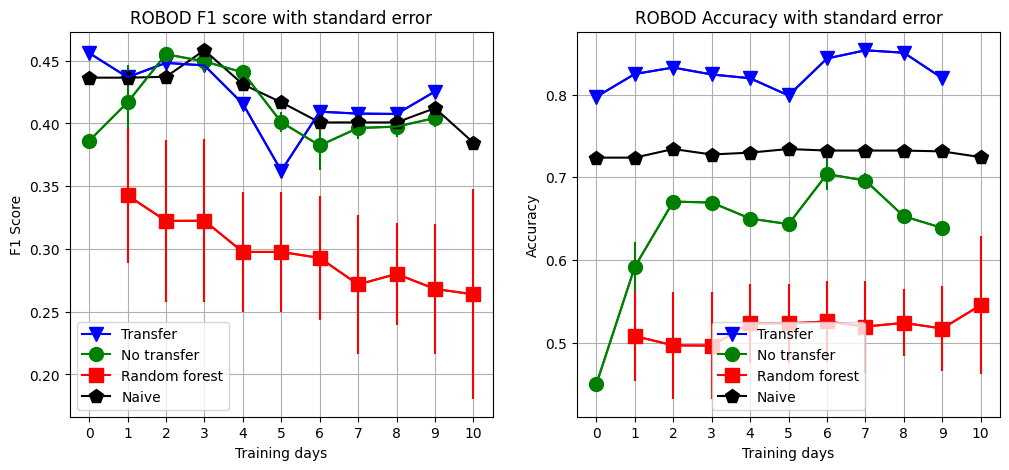

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sub_df = grouped.loc[(grouped['Type_']=='Transfer') & (grouped['Num_frozen_']==1)]
sub_df_nt = grouped.loc[(grouped['Type_']=='No transfer')]
sub_df_rf = grouped.loc[(grouped['Type_']=='RF')]
sub_df_naive = grouped.loc[(grouped['Type_']=='Naive')]
ax1.plot(sub_df['Train_days_'], sub_df['TestF1_mean'], 'bv-', label='Transfer', markersize=10)
ax1.errorbar(sub_df['Train_days_'], sub_df['TestF1_mean'], sub_df['TestF1_std'], fmt='b')
ax1.plot(sub_df_nt['Train_days_'], sub_df_nt['TestF1_mean'], 'go-', label='No transfer', markersize=10)
ax1.errorbar(sub_df_nt['Train_days_'], sub_df_nt['TestF1_mean'], sub_df_nt['TestF1_std'], fmt='g')
ax1.plot(sub_df_rf['Train_days_'], sub_df_rf['TestF1_mean'], 'rs-', label='Random forest', markersize=10)
ax1.errorbar(sub_df_rf['Train_days_'], sub_df_rf['TestF1_mean'], sub_df_rf['TestF1_std'], fmt='r')
ax1.plot(sub_df_naive['Train_days_'], sub_df_naive['TestF1_mean'], 'kp-', label='Naive', markersize=10)
ax2.plot(sub_df['Train_days_'], sub_df['TestAcc_mean'], 'bv-', label='Transfer', markersize=10)
ax2.errorbar(sub_df['Train_days_'], sub_df['TestAcc_mean'], sub_df['TestF1_std'], fmt='b')
ax2.plot(sub_df_nt['Train_days_'], sub_df_nt['TestAcc_mean'], 'go-', label='No transfer', markersize=10)
ax2.errorbar(sub_df_nt['Train_days_'], sub_df_nt['TestAcc_mean'], sub_df_nt['TestF1_std'], fmt='g')
ax2.plot(sub_df_rf['Train_days_'], sub_df_rf['TestAcc_mean'], 'rs-', label='Random forest', markersize=10)
ax2.errorbar(sub_df_rf['Train_days_'], sub_df_rf['TestAcc_mean'], sub_df_rf['TestF1_std'], fmt='r')
ax2.plot(sub_df_naive['Train_days_'], sub_df_naive['TestAcc_mean'], 'kp-', label='Naive', markersize=10)
ax1.set_xticks(ticks=range(0,11), labels=range(0,11))
ax1.set_xlabel('Training days')
ax1.set_ylabel('F1 Score')
ax1.set_title('ROBOD F1 score with standard error')
ax1.legend()
ax2.set_xticks(ticks=range(0,11), labels=range(0,11))
ax2.set_xlabel('Training days')
ax2.set_ylabel('Accuracy')
ax2.set_title('ROBOD Accuracy with standard error')
ax2.legend()
ax1.grid(True)
ax2.grid(True)
plt.savefig('../fig/results_ROBOD.png', facecolor='white', bbox_inches='tight')

C:\Users\ermin.omeragic\AppData\Local\Temp\ipykernel_19564\659936497.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax1.plot(sub_df_1['Train_days_'][1:6], sub_df_1['TestF1_mean'][1:6], 'go-', label='Frozen: 1 layer', markersize=10)
C:\Users\ermin.omeragic\AppData\Local\Temp\ipykernel_19564\659936497.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax1.errorbar(sub_df_1['Train_days_'][1:6], sub_df_1['TestF1_mean'][1:6], sub_df_1['TestF1_std'][1:6], fmt='g')
C:\Users\ermin.

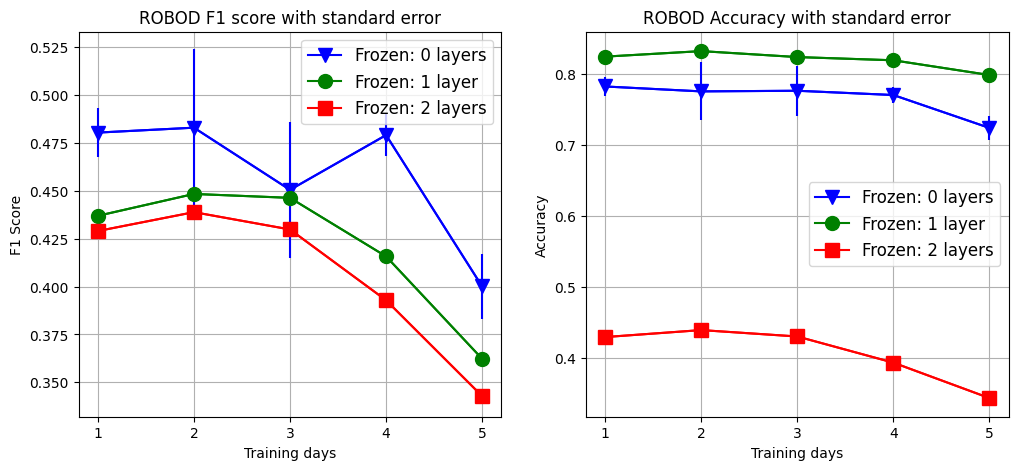

In [7]:
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sub_df = grouped.loc[(grouped['Type_']=='Transfer') & (grouped['Num_frozen_']==0)]
sub_df_1 = grouped.loc[(grouped['Type_']=='Transfer') & (grouped['Num_frozen_']==1)]
sub_df_2 = grouped.loc[(grouped['Type_']=='Transfer') & (grouped['Num_frozen_']==2)]
ax1.plot(sub_df['Train_days_'], sub_df['TestF1_mean'], 'bv-', label='Frozen: 0 layers', markersize=10)
ax1.errorbar(sub_df['Train_days_'], sub_df['TestF1_mean'], sub_df['TestF1_std'], fmt='b')
ax1.plot(sub_df_1['Train_days_'][1:6], sub_df_1['TestF1_mean'][1:6], 'go-', label='Frozen: 1 layer', markersize=10)
ax1.errorbar(sub_df_1['Train_days_'][1:6], sub_df_1['TestF1_mean'][1:6], sub_df_1['TestF1_std'][1:6], fmt='g')
ax1.plot(sub_df_2['Train_days_'], sub_df_2['TestF1_mean'], 'rs-', label='Frozen: 2 layers', markersize=10)
ax1.errorbar(sub_df_2['Train_days_'], sub_df_2['TestF1_mean'], sub_df_2['TestF1_std'], fmt='r')
ax2.plot(sub_df['Train_days_'], sub_df['TestAcc_mean'], 'bv-', label='Frozen: 0 layers', markersize=10)
ax2.errorbar(sub_df['Train_days_'], sub_df['TestAcc_mean'], sub_df['TestF1_std'], fmt='b')
ax2.plot(sub_df_1['Train_days_'][1:6], sub_df_1['TestAcc_mean'][1:6], 'go-', label='Frozen: 1 layer', markersize=10)
ax2.errorbar(sub_df_1['Train_days_'][1:6], sub_df_1['TestAcc_mean'][1:6], sub_df_1['TestF1_std'][1:6], fmt='g')
ax2.plot(sub_df_2['Train_days_'], sub_df_2['TestF1_mean'], 'rs-', label='Frozen: 2 layers', markersize=10)
ax2.errorbar(sub_df_2['Train_days_'], sub_df_2['TestF1_mean'], sub_df_2['TestF1_std'], fmt='r')
ax1.set_xticks(ticks=range(1,6), labels=range(1,6))
ax1.set_xlabel('Training days')
ax1.set_ylabel('F1 Score')
ax1.set_title('ROBOD F1 score with standard error')
ax1.legend(fontsize=12)
ax2.set_xticks(ticks=range(1,6), labels=range(1,6))
ax2.set_xlabel('Training days')
ax2.set_ylabel('Accuracy')
ax2.set_title('ROBOD Accuracy with standard error')
ax2.legend(fontsize=12)
ax1.grid(True)
ax2.grid(True)
plt.savefig('../fig/layerfreezing.png', bbox_inches='tight', facecolor='white')

# ECO

In [8]:
results_eco = pd.read_csv('../results/results_ECO.csv')
results_eco.head()

,Dataset,Model,BatchSize,StartingLr,N_days,HiddenSize,Seed,BestEpoch,TestAcc,TestLoss,ValAcc,ValLoss,TestF1,ValF1,TrainLoss,Train_days,Num_frozen,Type
0,ECO,LSTM,512.0,0.05,10.0,32.0,4444.0,6.0,0.841873,0.3752,0.879782,0.2770,0.723749,0.738768,0.187100,3,0,Transfer
1,ECO,LSTM,512.0,0.05,10.0,32.0,4444.0,10.0,0.797175,0.4697,0.871433,0.3065,0.674337,0.670229,0.234845,9,0,Transfer
2,ECO,LSTM,512.0,0.05,10.0,32.0,4444.0,9.0,0.831959,0.4116,0.902276,0.2087,0.719506,0.871736,0.279791,6,0,Transfer
3,ECO,LSTM,512.0,0.05,10.0,32.0,5555.0,9.0,0.830938,0.4133,0.872452,0.3191,0.706958,0.647925,0.226234,9,0,Transfer
4,ECO,LSTM,512.0,0.05,10.0,32.0,5555.0,2.0,0.807783,0.4211,0.847858,0.3053,0.734863,0.776385,0.417852,3,0,Transfer


In [9]:
grouped = results_eco.groupby(['Train_days', 'Num_frozen', 'Type']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestF1', 'TestAcc']]
grouped.reset_index(inplace=True)
grouped.columns = grouped.columns.map('_'.join)
grouped

C:\Users\ermin.omeragic\AppData\Local\Temp\ipykernel_19564\3144115810.py:1: FutureWarning: ['Dataset', 'Model'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = results_eco.groupby(['Train_days', 'Num_frozen', 'Type']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestF1', 'TestAcc']]


,Train_days_,Num_frozen_,Type_,TestF1_mean,TestF1_std,TestF1_count_nonzero,TestAcc_mean,TestAcc_std,TestAcc_count_nonzero
0,0,0,Naive,0.396662,NaN,1,0.376273,NaN,1
1,0,0,No Transfer,0.505659,0.405315,7,0.513898,0.361157,9
2,0,0,Transfer,0.922189,NaN,1,0.922081,NaN,1
3,1,0,Naive,0.398041,NaN,1,0.375633,NaN,1
4,1,0,No Transfer,0.341891,0.310118,8,0.344778,0.263827,9
5,1,0,Transfer,0.816401,0.017062,9,0.796616,0.020537,9
6,1,2,RF,0.900015,0.024125,9,0.821119,0.038720,9
7,2,0,Naive,0.395193,NaN,1,0.376049,NaN,1
8,2,0,No Transfer,0.424701,0.135088,6,0.415943,0.120728,6
9,2,0,Transfer,0.653174,0.081213,6,0.618040,0.079833,6


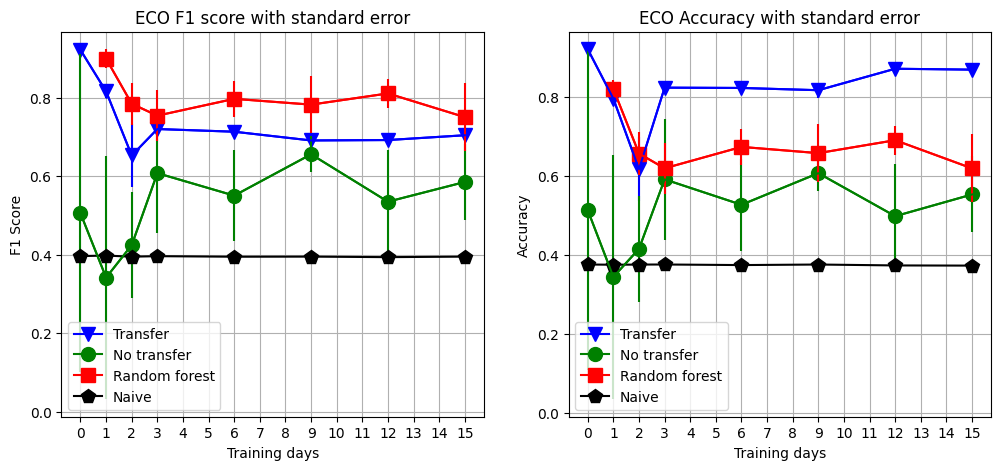

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sub_df = grouped.loc[(grouped['Type_']=='Transfer') & (grouped['Num_frozen_']==0)]
sub_df_nt = grouped.loc[(grouped['Type_']=='No Transfer')]
sub_df_rf = grouped.loc[(grouped['Type_']=='RF')]
sub_df_naive = grouped.loc[(grouped['Type_']=='Naive')]
ax1.plot(sub_df['Train_days_'], sub_df['TestF1_mean'], 'bv-', label='Transfer', markersize=10)
ax1.errorbar(sub_df['Train_days_'], sub_df['TestF1_mean'], sub_df['TestF1_std'], fmt='b')
ax1.plot(sub_df_nt['Train_days_'], sub_df_nt['TestF1_mean'], 'go-', label='No transfer', markersize=10)
ax1.errorbar(sub_df_nt['Train_days_'], sub_df_nt['TestF1_mean'], sub_df_nt['TestF1_std'], fmt='g')
ax1.plot(sub_df_rf['Train_days_'], sub_df_rf['TestF1_mean'], 'rs-', label='Random forest', markersize=10)
ax1.errorbar(sub_df_rf['Train_days_'], sub_df_rf['TestF1_mean'], sub_df_rf['TestF1_std'], fmt='r')
ax1.plot(sub_df_naive['Train_days_'], sub_df_naive['TestF1_mean'], 'kp-', label='Naive', markersize=10)
ax2.plot(sub_df['Train_days_'], sub_df['TestAcc_mean'], 'bv-', label='Transfer', markersize=10)
ax2.errorbar(sub_df['Train_days_'], sub_df['TestAcc_mean'], sub_df['TestF1_std'], fmt='b')
ax2.plot(sub_df_nt['Train_days_'], sub_df_nt['TestAcc_mean'], 'go-', label='No transfer', markersize=10)
ax2.errorbar(sub_df_nt['Train_days_'], sub_df_nt['TestAcc_mean'], sub_df_nt['TestF1_std'], fmt='g')
ax2.plot(sub_df_rf['Train_days_'], sub_df_rf['TestAcc_mean'], 'rs-', label='Random forest', markersize=10)
ax2.errorbar(sub_df_rf['Train_days_'], sub_df_rf['TestAcc_mean'], sub_df_rf['TestF1_std'], fmt='r')
ax2.plot(sub_df_naive['Train_days_'], sub_df_naive['TestAcc_mean'], 'kp-', label='Naive', markersize=10)
ax1.set_xticks(ticks=range(0,16), labels=range(0,16))
ax1.set_xlabel('Training days')
ax1.set_ylabel('F1 Score')
ax1.set_title('ECO F1 score with standard error')
ax1.legend()
ax2.set_xticks(ticks=range(0,16), labels=range(0,16))
ax2.set_xlabel('Training days')
ax2.set_ylabel('Accuracy')
ax2.set_title('ECO Accuracy with standard error')
ax2.legend()
ax1.grid(True)
ax2.grid(True)
plt.savefig('../fig/results_ECO.png', facecolor='white', bbox_inches='tight')

# HPDMobile

In [11]:
results_hpdmobile = pd.read_csv('../results/results_HPDMobile.csv')
results_hpdmobile.head()

,Dataset,Model,BatchSize,StartingLr,N_days,HiddenSize,Seed,BestEpoch,TestAcc,TestLoss,ValAcc,ValLoss,TestF1,ValF1,TrainLoss,Train_days,Num_frozen_layers,Type
0,HPDMobile,LSTM,512.0,0.025,15.0,32.0,1111.0,13.0,0.859480,0.3823,0.962891,0.1287,0.530534,0.522248,0.220693,2,2,No Transfer
1,HPDMobile,LSTM,512.0,0.025,15.0,32.0,1111.0,15.0,0.852005,0.4796,0.978264,0.1029,0.518841,0.536182,0.186425,4,2,No Transfer
2,HPDMobile,LSTM,512.0,0.025,15.0,32.0,1111.0,5.0,0.851572,0.3836,0.891003,0.2661,0.515068,0.467128,0.188766,6,2,No Transfer
3,HPDMobile,LSTM,512.0,0.025,15.0,32.0,22.0,11.0,0.859343,0.4147,0.962324,0.1273,0.530352,0.521899,0.231271,2,2,No Transfer
4,HPDMobile,LSTM,512.0,0.025,15.0,32.0,22.0,10.0,0.851788,0.4173,0.977949,0.1053,0.518776,0.536005,0.212866,4,2,No Transfer


In [12]:
grouped = results_hpdmobile.groupby(['Train_days', 'Num_frozen_layers', 'Type']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestF1', 'TestAcc']]
grouped.reset_index(inplace=True)
grouped.columns = grouped.columns.map('_'.join)
grouped

C:\Users\ermin.omeragic\AppData\Local\Temp\ipykernel_19564\2755100157.py:1: FutureWarning: ['Dataset', 'Model'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = results_hpdmobile.groupby(['Train_days', 'Num_frozen_layers', 'Type']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestF1', 'TestAcc']]


,Train_days_,Num_frozen_layers_,Type_,TestF1_mean,TestF1_std,TestF1_count_nonzero,TestAcc_mean,TestAcc_std,TestAcc_count_nonzero
0,0,0,Naive,0.411957,NaN,1,0.423393,NaN,1
1,0,0,Transfer,0.494249,0.000000,11,0.499824,0.000000,11
2,0,2,No Transfer,0.390733,0.200971,25,0.520467,0.085803,25
3,1,0,Naive,0.412000,NaN,1,0.426288,NaN,1
4,1,0,Transfer,0.511474,0.001807,20,0.855994,0.002085,20
5,1,2,No Transfer,0.503326,0.031235,20,0.815317,0.133046,20
6,1,2,RF,0.527613,0.166720,9,0.490558,0.224540,9
7,2,0,Naive,0.405495,NaN,1,0.424516,NaN,1
8,2,0,Transfer,0.512836,0.012204,27,0.854826,0.004696,27
9,2,2,No Transfer,0.511300,0.046959,13,0.792580,0.163352,13


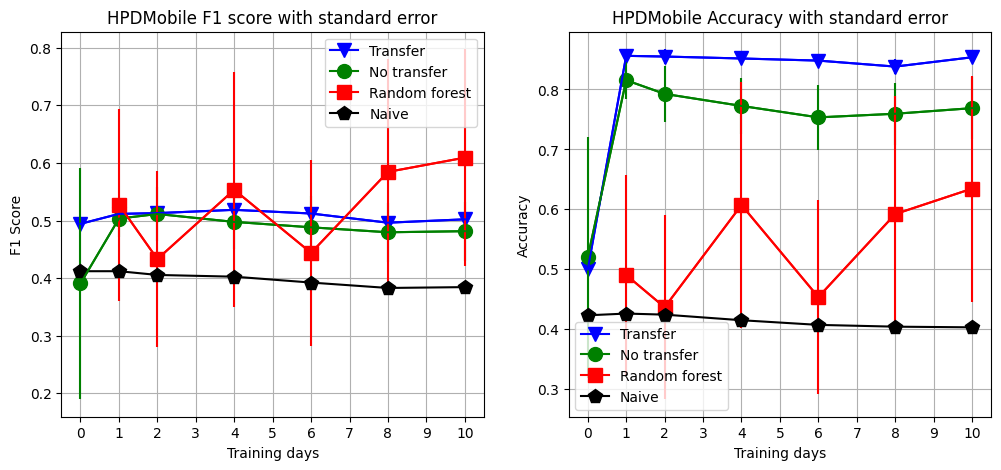

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sub_df = grouped.loc[(grouped['Type_']=='Transfer') & (grouped['Num_frozen_layers_']==0)]
sub_df_nt = grouped.loc[(grouped['Type_']=='No Transfer')]
sub_df_rf = grouped.loc[(grouped['Type_']=='RF')]
sub_df_naive = grouped.loc[(grouped['Type_']=='Naive')]
ax1.plot(sub_df['Train_days_'], sub_df['TestF1_mean'], 'bv-', label='Transfer', markersize=10)
ax1.errorbar(sub_df['Train_days_'], sub_df['TestF1_mean'], sub_df['TestF1_std'], fmt='b')
ax1.plot(sub_df_nt['Train_days_'], sub_df_nt['TestF1_mean'], 'go-', label='No transfer', markersize=10)
ax1.errorbar(sub_df_nt['Train_days_'], sub_df_nt['TestF1_mean'], sub_df_nt['TestF1_std'], fmt='g')
ax1.plot(sub_df_rf['Train_days_'], sub_df_rf['TestF1_mean'], 'rs-', label='Random forest', markersize=10)
ax1.errorbar(sub_df_rf['Train_days_'], sub_df_rf['TestF1_mean'], sub_df_rf['TestF1_std'], fmt='r')
ax1.plot(sub_df_naive['Train_days_'], sub_df_naive['TestF1_mean'], 'kp-', label='Naive', markersize=10)
ax2.plot(sub_df['Train_days_'], sub_df['TestAcc_mean'], 'bv-', label='Transfer', markersize=10)
ax2.errorbar(sub_df['Train_days_'], sub_df['TestAcc_mean'], sub_df['TestF1_std'], fmt='b')
ax2.plot(sub_df_nt['Train_days_'], sub_df_nt['TestAcc_mean'], 'go-', label='No transfer', markersize=10)
ax2.errorbar(sub_df_nt['Train_days_'], sub_df_nt['TestAcc_mean'], sub_df_nt['TestF1_std'], fmt='g')
ax2.plot(sub_df_rf['Train_days_'], sub_df_rf['TestAcc_mean'], 'rs-', label='Random forest', markersize=10)
ax2.errorbar(sub_df_rf['Train_days_'], sub_df_rf['TestAcc_mean'], sub_df_rf['TestF1_std'], fmt='r')
ax2.plot(sub_df_naive['Train_days_'], sub_df_naive['TestAcc_mean'], 'kp-', label='Naive', markersize=10)
ax1.set_xticks(ticks=range(0,11), labels=range(0,11))
ax1.set_xlabel('Training days')
ax1.set_ylabel('F1 Score')
ax1.set_title('HPDMobile F1 score with standard error')
ax1.legend()
ax2.set_xticks(ticks=range(0,11), labels=range(0,11))
ax2.set_xlabel('Training days')
ax2.set_ylabel('Accuracy')
ax2.set_title('HPDMobile Accuracy with standard error')
ax2.legend()
ax1.grid(True)
ax2.grid(True)
plt.savefig('../fig/results_HPDMobile.png', facecolor='white', bbox_inches='tight')